<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Quiz/week8_quiz_mnist_dongjoo195.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

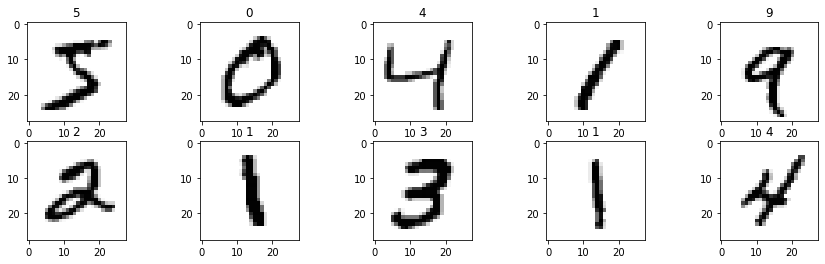

In [3]:
fig = plt.figure(figsize=(15, 4))

for i in range(10):
    plottable_image = np.reshape(x_train[i], (28, 28))
    # print(y_train[i])
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(y_train[i])
    ax.imshow(plottable_image, cmap='gray_r')

In [4]:
x_train_all = x_train
y_train_all = y_train
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

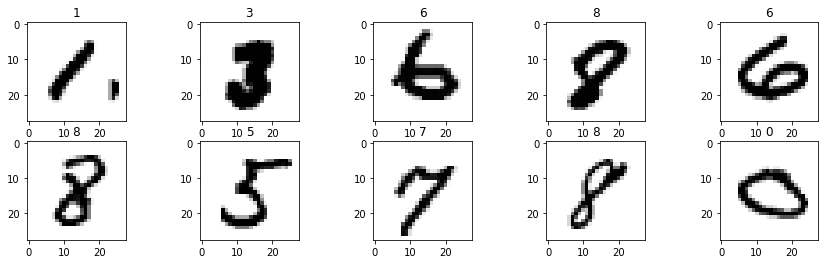

In [5]:
fig = plt.figure(figsize=(15, 4))

for i in range(10):
    plottable_image = np.reshape(x_train[i], (28, 28))
    # print(y_train[i])
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(y_train[i])
    ax.imshow(plottable_image, cmap='gray_r')

In [6]:
print("학습 데이터셋 클래스별 샘플 수 : ", np.bincount(y_train))
print("평가 데이터셋 클래스별 샘플 수 : ", np.bincount(y_valid))

학습 데이터셋 클래스별 샘플 수 :  [4738 5394 4766 4905 4674 4337 4734 5012 4681 4759]
평가 데이터셋 클래스별 샘플 수 :  [1185 1348 1192 1226 1168 1084 1184 1253 1170 1190]


In [7]:
np.max(x_train)

255

In [8]:
x_train = x_train / 255
x_valid = x_valid / 255 
x_test = x_test / 255

In [9]:
x_train_reshape = x_train.reshape(-1, 784)
x_valid_reshape = x_valid.reshape(-1, 784)
x_test_reshape = x_test.reshape(-1, 784)

print("학습 데이터 셋의 형태 : ", x_train_reshape.shape)
print("검증 데이터 셋의 형태 : ", x_valid_reshape.shape)

학습 데이터 셋의 형태 :  (48000, 784)
검증 데이터 셋의 형태 :  (12000, 784)


In [10]:
#원 핫 인코딩
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_valid_encoded = tf.keras.utils.to_categorical(y_valid)

In [11]:
import torch
x_train_torch = torch.FloatTensor(x_train_reshape)
y_train_torch = torch.FloatTensor(y_train_encoded)
x_valid_torch = torch.FloatTensor(x_valid_reshape)
y_valid_torch = torch.FloatTensor(y_valid_encoded) 
x_test_torch = torch.FloatTensor(x_test_reshape)
y_test_torch = torch.FloatTensor(y_test)

# 신경망 만들기

In [12]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [13]:
class NumDataset(Dataset):
  def __init__(self, x, y):
    self.x_data = x
    self.y_data = y
  
  def __getitem__(self, index):
    x = self.x_data[index]
    y = self.y_data[index]
    return x, y
  
  def collate_fn(self, batch):
    x, y = zip(*batch)
    return x, y

  def __len__(self):
    return len(self.x_data)

In [14]:
dataset = NumDataset(x_train_torch, y_train_torch)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, drop_last=True)

In [15]:
from tqdm import tqdm 
import random 

random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

model = nn.Sequential(
    nn.Linear(784, 700),
    nn.ReLU(), 
    nn.Linear(700, 500),
    nn.ReLU(), 
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    )

optim = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

global_step = 0 
epochs=20
for epoch in range(epochs):
  t = tqdm(dataloader, ncols=100)
  for i, batch in enumerate(t):
    x_batch = batch[0]
    y_batch = batch[1]
    output = model(x_batch)
    loss = criterion(output, y_batch)
    model.zero_grad() 
    optim.zero_grad()
    loss.backward()
    optim.step()

    global_step += 1
    t.set_description("epoch: {} | global_step: {:8d} | loss: {:.4f}".format(epoch + 1, global_step, loss))

  predicts = model(x_valid_torch)
  predicts = torch.argmax(predicts, 1)

  correct = 0 
  for i in range(len(predicts)):
    if predicts[i].item() == y_valid[i]:
      correct += 1
  acc = correct / len(predicts)
  print("epoch: {} | global_step: {} | valid acc: {:%}".format(epoch + 1, global_step, acc))

epoch: 1 | global_step:      750 | loss: 0.3794: 100%|████████████| 750/750 [00:27<00:00, 27.76it/s]


epoch: 1 | global_step: 750 | valid acc: 91.175000%


epoch: 2 | global_step:     1500 | loss: 0.2477: 100%|████████████| 750/750 [00:22<00:00, 33.06it/s]


epoch: 2 | global_step: 1500 | valid acc: 93.183333%


epoch: 3 | global_step:     2250 | loss: 0.2093: 100%|████████████| 750/750 [00:21<00:00, 35.22it/s]


epoch: 3 | global_step: 2250 | valid acc: 94.950000%


epoch: 4 | global_step:     3000 | loss: 0.2921: 100%|████████████| 750/750 [00:23<00:00, 32.22it/s]


epoch: 4 | global_step: 3000 | valid acc: 95.683333%


epoch: 5 | global_step:     3750 | loss: 0.1637: 100%|████████████| 750/750 [00:22<00:00, 33.69it/s]


epoch: 5 | global_step: 3750 | valid acc: 96.083333%


epoch: 6 | global_step:     4500 | loss: 0.0418: 100%|████████████| 750/750 [00:21<00:00, 34.60it/s]


epoch: 6 | global_step: 4500 | valid acc: 96.408333%


epoch: 7 | global_step:     5250 | loss: 0.0554: 100%|████████████| 750/750 [00:21<00:00, 35.15it/s]


epoch: 7 | global_step: 5250 | valid acc: 96.850000%


epoch: 8 | global_step:     6000 | loss: 0.0238: 100%|████████████| 750/750 [00:22<00:00, 33.68it/s]


epoch: 8 | global_step: 6000 | valid acc: 96.950000%


epoch: 9 | global_step:     6750 | loss: 0.1454: 100%|████████████| 750/750 [00:23<00:00, 32.42it/s]


epoch: 9 | global_step: 6750 | valid acc: 97.158333%


epoch: 10 | global_step:     7500 | loss: 0.0454: 100%|███████████| 750/750 [00:21<00:00, 34.30it/s]


epoch: 10 | global_step: 7500 | valid acc: 96.825000%


epoch: 11 | global_step:     8250 | loss: 0.1200: 100%|███████████| 750/750 [00:21<00:00, 35.44it/s]


epoch: 11 | global_step: 8250 | valid acc: 97.116667%


epoch: 12 | global_step:     9000 | loss: 0.0822: 100%|███████████| 750/750 [00:20<00:00, 36.59it/s]


epoch: 12 | global_step: 9000 | valid acc: 97.083333%


epoch: 13 | global_step:     9750 | loss: 0.0264: 100%|███████████| 750/750 [00:21<00:00, 34.38it/s]


epoch: 13 | global_step: 9750 | valid acc: 97.566667%


epoch: 14 | global_step:    10500 | loss: 0.0260: 100%|███████████| 750/750 [00:20<00:00, 36.88it/s]


epoch: 14 | global_step: 10500 | valid acc: 97.458333%


epoch: 15 | global_step:    11250 | loss: 0.0032: 100%|███████████| 750/750 [00:20<00:00, 35.79it/s]


epoch: 15 | global_step: 11250 | valid acc: 97.400000%


epoch: 16 | global_step:    12000 | loss: 0.0105: 100%|███████████| 750/750 [00:21<00:00, 34.72it/s]


epoch: 16 | global_step: 12000 | valid acc: 97.558333%


epoch: 17 | global_step:    12750 | loss: 0.0326: 100%|███████████| 750/750 [00:20<00:00, 35.89it/s]


epoch: 17 | global_step: 12750 | valid acc: 97.566667%


epoch: 18 | global_step:    13500 | loss: 0.0025: 100%|███████████| 750/750 [00:20<00:00, 36.89it/s]


epoch: 18 | global_step: 13500 | valid acc: 97.741667%


epoch: 19 | global_step:    14250 | loss: 0.0041: 100%|███████████| 750/750 [00:20<00:00, 36.99it/s]


epoch: 19 | global_step: 14250 | valid acc: 97.783333%


epoch: 20 | global_step:    15000 | loss: 0.0038: 100%|███████████| 750/750 [00:21<00:00, 35.40it/s]


epoch: 20 | global_step: 15000 | valid acc: 97.525000%


In [16]:
predict = model(x_test_torch)
predict = torch.argmax(predict, 1)

In [17]:
correct = 0 
for i in range(len(predict)):
  if predict[i].item() == y_test[i]:
    correct += 1
acc = correct/len(predict)
print("Test accuracy : {:.2%}".format(acc))

Test accuracy : 97.86%


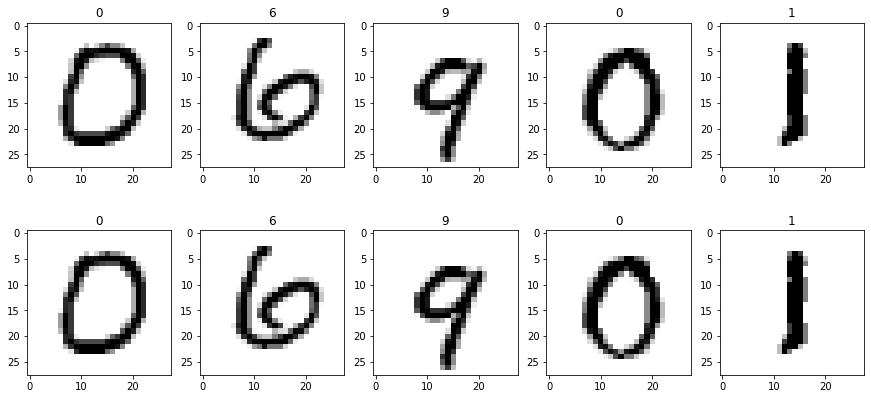

In [18]:
fig = plt.figure(figsize=(15, 7))

for i in range(5):
    plottable_image = x_test[i+10]
    ax = fig.add_subplot(2, 5, i+1)
    ax.title.set_text(y_test[i+10])
    ax.imshow(plottable_image, cmap='gray_r')
  
for i in range(5):
    plottable_image = x_test[i+10]
    ax = fig.add_subplot(2, 5, i+6)
    ax.title.set_text(predict[i+10].item())
    ax.imshow(plottable_image, cmap='gray_r')

plt.show()

In [19]:
x_train_torch.size()


torch.Size([48000, 784])

In [20]:
!pip install torchsummary
from torchsummary import summary as summary
summary(model, (48000, 784))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 48000, 700]         549,500
              ReLU-2           [-1, 48000, 700]               0
            Linear-3           [-1, 48000, 500]         350,500
              ReLU-4           [-1, 48000, 500]               0
            Linear-5           [-1, 48000, 200]         100,200
              ReLU-6           [-1, 48000, 200]               0
            Linear-7           [-1, 48000, 100]          20,100
              ReLU-8           [-1, 48000, 100]               0
            Linear-9            [-1, 48000, 10]           1,010
Total params: 1,021,310
Trainable params: 1,021,310
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 143.55
Forward/backward pass size (MB)